In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Problem Statement - I

 
### Introduction

1. Aims to give you an idea of applying EDA in a real business scenario. 
2. Applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services 
3. Understand how data is used to minimise the risk of losing money while lending to customers.
 
### Business Understanding

1. The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. 

IMPORTANT TO DO : IT MEANS THAT WE NEED TO Analyse the CREDIT HISTORY and make a decision to give loans and reduce the risk.

Reason Behind :

 Some consumers use it as their advantage by becoming a defaulter. 

2.   I am working for a consumer finance company which specialises in lending various types of loans to urban customers. 

3. I have to use EDA to analyse the patterns present in the data. 

Why AM I DOING ????........

4. This will ensure that the applicants are capable of repaying the loan are not rejected.
 
FLOW OF LOAN APPLICATION :

5. Company receives a 
    loan application ------ >>>>> 
    DECIDE ------>>>>>> loan approval based on the applicant’s profile. 


6. Two types of risks are associated with the bank’s decision:

 a. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 b. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
7.  Data given below contains the information about the loan application at the time of applying for the loan. 
    It contains two types of scenarios:

    The client with payment difficulties: 
    He/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

    All other cases: All other cases when the payment is paid on time.
 
 
#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application
2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

We need to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
 
 
### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).
 
### Data Understanding

Download the dataset from below.
Datasetfile_download	Download
This dataset has 3 files as explained below: 
 
1. 'application_data.csv'  contains all the information of the client at the time of application. 
The data is about whether a client has payment difficulties.
 
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
 
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Problem Statement - II

 
## Results Expected by Learners

1. Present the overall approach of the analysis in a presentation.

2. Mention the problem statement and the analysis approach briefly.

3. Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

4. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

5. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
 
Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

6. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

7. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). 
    Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 
    
8. Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. 

9. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 
 
10. You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

In [2]:
# Let us read the Data one by one and understand the data given

# LOAD the CSV FILES USING READ_CSV
Application_data = pd.read_csv('C:\\Upgrad\\Assignment\\0826_2019_Credit_EDA_GroupCaseStudy\\application_data.csv')
PreviousApplication_data = pd.read_csv('C:\\Upgrad\\Assignment\\0826_2019_Credit_EDA_GroupCaseStudy\\previous_application.csv')

#Application_data = pd.read_csv('Downloads\\application_data.csv')
#PreviousApplication_data = pd.read_csv('Downloads\\previous_application.csv')

In [90]:
Application_data.head(5) # CHECK THE DATA FOR CURRENT APPLICATION DATA SET


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
PreviousApplication_data.head(5) # CHECK THE DATA FOR PREVIOUS APPLICATION DATA SET

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# OBTAIN THE DIMENSION FOR THE CURRENT DATA SET
Application_data.shape

(307511, 122)

In [6]:
Application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# OBTAIN THE DIMENSION FOR THE PREVIOUS DATA SET
PreviousApplication_data.shape

(1670214, 37)

In [8]:
PreviousApplication_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [9]:
# There are two sets of data is there. as we can see the coloumn SK_ID_CURR is same in both the data frames. 
# Let us index it both the data frames using pivot table functions. 

df1 = pd.pivot_table(Application_data,index=["SK_ID_CURR","NAME_CONTRACT_TYPE"])
df1.head(3)

,,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
SK_ID_CURR,NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
100003,Cash loans,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
100004,Revolving loans,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2 = pd.pivot_table(PreviousApplication_data,index=["SK_ID_CURR","NAME_CONTRACT_TYPE"])
df2.head(2)

,,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,HOUR_APPR_PROCESS_START,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,SELLERPLACE_AREA,SK_ID_PREV
SK_ID_CURR,NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,
100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,8.0,-1740.0,365243.0,-1709.0,-1619.0,-1499.0,-1612.0,13.0,0.0,1.0,0.104326,NaN,NaN,23.0,1369693.0
100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,24.0,-606.0,365243.0,-565.0,-25.0,125.0,-17.0,9.0,0.0,1.0,0.000000,NaN,NaN,500.0,1038818.0


In [92]:
# FIND THE NAN VALUE % IN EACH COLUMN
round(Application_data.isnull().mean(axis=0).sort_values(ascending=False)*100,2)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

In [12]:
##################################
# CLEAN THE CURRENT DATA SET     #
##################################

# List the cells having less than 13.5% NAN values and store it to variable in descending order.
Df3 = Application_data.loc[:,round(Application_data.isnull().mean().sort_values(ascending=False)*100) < 13.5]

# List the columns and its mean percentage (%) of NAN values
round(Df3.isnull().mean(axis=0).sort_values(ascending=False)*100,2)

# LIST THE COLUMN NAMES IN THE CURRENT APPLICATION
Df3.columns

# MISCELLANEOUS COLUMNS THAT WILL BE DROPPED
curr_to_drop = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
                'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
                'FLAG_DOCUMENT_21', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
                'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 
                'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2']

# DROP THE COLUMNS THAT NEEDS TO BE EXCLUDED FROM ANALYSIS
Df3 = Df3.drop(curr_to_drop, axis=1)

# DIMENSION of PREVIOUS_APPLICATION DATAFRAME AFTER DROPPING COLUMNS
print(Df3.shape)

# # LIST THE COLUMN NAMES IN THE CURRENT APPLICATION AFTER DROPPING COLUMNS
Df3.columns

(307511, 24)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [13]:
# CURRENT DATA SET --  VERIFY THE NAN VALUES PERCENTAGE (%) FOR EACH COLUMN 
round(Df3.isnull().mean(axis=0).sort_values(ascending=False)*100,2)


NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
ORGANIZATION_TYPE              0.00
REGION_RATING_CLIENT_W_CITY    0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
REGION_RATING_CLIENT           0.00
SK_ID_CURR                     0.00
dtype: float64

In [14]:
# CURRENT DATA SET --  CONVERT NUMBER OF DAYS INTO YEARS
round(Df3[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].abs()/365,2).head(15)

# WE NOTICE THAT 1000.67 IS A INFINITELY HIGH VALUE THAT CAN BE IGNORED

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25.92,1.75,9.99,5.81
1,45.93,3.25,3.25,0.80
2,52.18,0.62,11.67,6.93
3,52.07,8.33,26.94,6.68
4,54.61,8.32,11.81,9.47
5,46.41,4.35,13.62,1.31
6,37.75,8.58,3.32,1.70
7,51.64,1.23,12.59,6.52
8,55.07,1000.67,20.35,9.63
9,39.64,5.53,39.55,10.94


In [15]:
# CURRENT DATA SET --  CONVERT DAYS TO YEARS AND REMOVE THE NEGATIVE VALUE
# STORE THE REVISED VALUES IN THE DATAFRAME DF3 IN DENOMINATION OF "YEARS"

Df3[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = round(Df3[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].abs()/(365),2)

# VERIFY THE NEW VALUES OF COLUMNS
Df3[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25.92,1.75,9.99,5.81
1,45.93,3.25,3.25,0.80
2,52.18,0.62,11.67,6.93
3,52.07,8.33,26.94,6.68
4,54.61,8.32,11.81,9.47


In [16]:
# CURRENT DATA SET -- FIND THE NAN VALUE PERCENTAGE IN THE ROWS
#(Df3.isnull().sum(axis=1).sort_values(ascending=False)/Df3.shape[0])*100)

(round(Df3.isnull().mean(axis=1).sort_values(ascending=False)*100,2)).head(4)

187348    12.50
41982     12.50
236260     8.33
64184      8.33
dtype: float64

In [17]:
#########################################
# "PREVIOUS_APPLICANT" PROFILE ANALYSIS #
#########################################

# Check for the NAN values percentages
# Analysis the coloumns in the "PREVIOUS_Applicants" profile 

# List the cells having less than 22% NAN values and store it to variable in descending order.
Df2 = PreviousApplication_data.loc[:,round(PreviousApplication_data.isnull().mean().sort_values(ascending=False)*100) < 24]

# List the columns and its mean percentage (%) of NAN values
round(Df2.isnull().mean(axis=0).sort_values(ascending=False)*100,2)

# MISCELLANEOUS COLUMNS THAT WILL BE DROPPED
prev_to_drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                'NFLAG_LAST_APPL_IN_DAY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']

# DROP THE COLUMNS THAT NEEDS TO BE EXCLUDED FROM ANALYSIS
Df2 = Df2.drop(prev_to_drop, axis=1)

# DIMENSION of PREVIOUS_APPLICATION DATAFRAME AFTER DROPPING COLUMNS
print(Df2.shape)

# List the columns after dropping columns
Df2.columns

Df2.head(3)


(1670214, 19)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,-1,XNA,12.0,high,Cash X-Sell: high


In [18]:
# FINAL CHECKS FOR NAN VALUES IN THE ROWS 
(round(Df2.isnull().mean(axis=1).sort_values(ascending=False)*100,2)).head(5)

1215585    21.05
169393     21.05
174636     21.05
535228     21.05
387984     21.05
dtype: float64

In [19]:
# Now We have cleaned all the data sets of both the data sets. 

# FILTER THE CATEGORICAL VARIABLES BASED ON "OBJECT" DATA TYPE 
application_categorical = Df3.select_dtypes(include = ['object']).columns
application_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [20]:
# FILTER THE QUANTITATIVE VARIABLES BASED ON "OBJECT" DATA TYPE
application_quant = Df3.select_dtypes(include = ['int64', 'float64']).columns
application_quant

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

In [21]:
# CONVERT AND STOREG THE CATEGORICAL VARIABLES OF PREVIOUS APPLICATION
previous_categorical = Df2.select_dtypes(include = ['object']).columns
previous_categorical

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [22]:
# CONVERT AND STOREG THE QUANTITATIVE VARIABLES OF PREVIOUS APPLICATION
previous_quant = Df2.select_dtypes(include = ['int64', 'float64']).columns
previous_quant

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [23]:
Df3.describe() # DATA INSPECTION IN CURRENT APPLICATION

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,43.936976,185.548007,13.660596,8.203299,2.152665,2.052463,2.031521
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,11.956135,382.039306,9.651742,4.135474,0.910682,0.509034,0.502737
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,20.520000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,34.010000,2.560000,5.510000,4.710000,2.000000,2.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,43.150000,6.080000,12.340000,8.920000,2.000000,2.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,53.920000,15.640000,20.490000,11.780000,3.000000,2.000000,2.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,69.120000,1000.670000,67.590000,19.720000,20.000000,3.000000,3.000000


In [24]:
Df2.describe() # DATA INSPECTION IN PREVIOUS APPLICATION

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00,4.000000e+06,8.400000e+01


In [25]:
Df3.columns # VERIFY THE COLUMNS

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

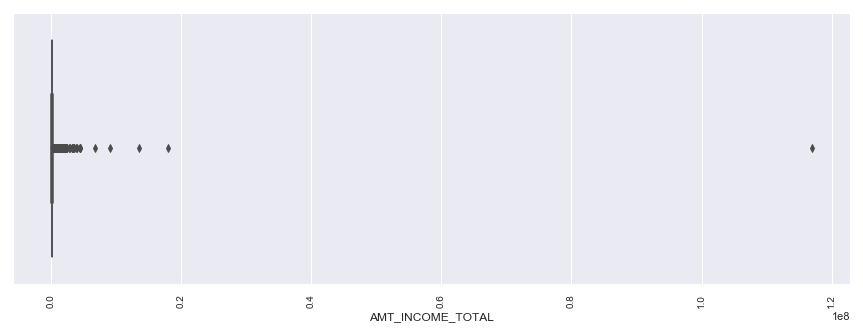

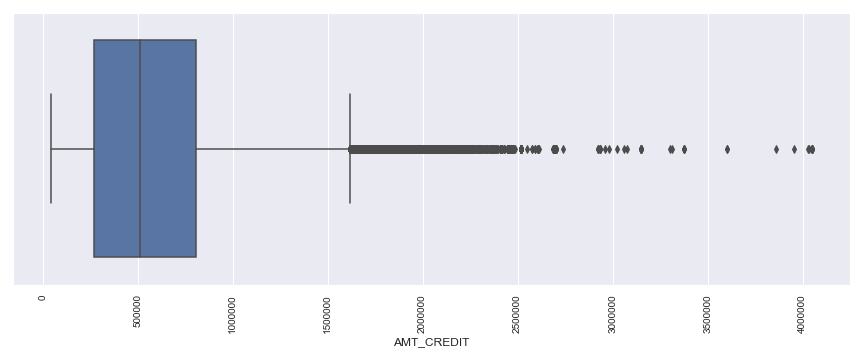

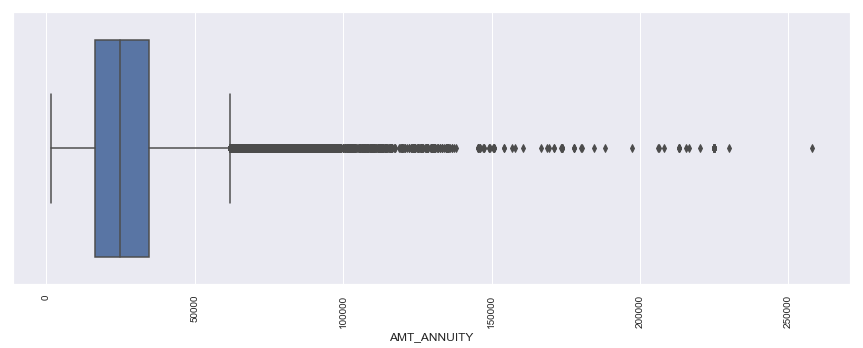

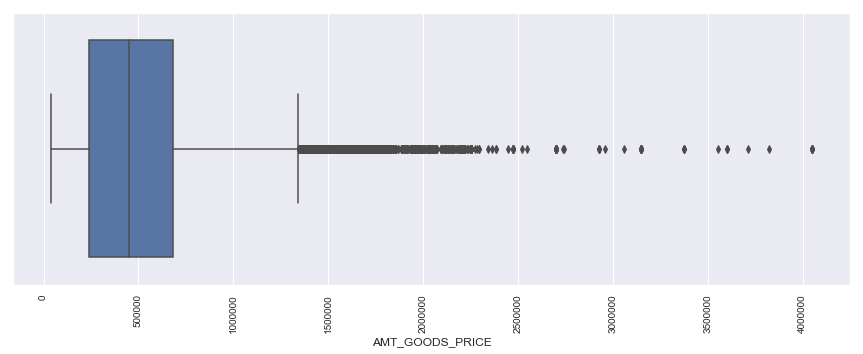

In [26]:
#############################################################################################
# PLOT A BOX CHART FOR THE CURRENT APPLICATION'S QUANTITATIVE VARIABLES TO SEE THE OUTLIERS #
#############################################################################################
appl_box = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for i in Df3[appl_box]:
    plt.figure(1,figsize=(15,5))
    sns.boxplot(Df3[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

In [94]:
# DATA CLEANING
# 1A. REMOVE OUTLIERS FROM QUANTITATIVE VARIABLES of CURRENT APPLICATION
test_box_df3 = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH']
new_copy = Df3[test_box_df3]

for i in new_copy.columns:
    Q1 = new_copy[i].quantile(0.25)
    Q3 = new_copy[i].quantile(0.75)

    IQR = Q3 - Q1
    
    
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    
    new_copy[(new_copy.AMT_CREDIT <= upper_fence)].head()
    new_copy[i][new_copy[i] <= lower_fence] = lower_fence
    new_copy[i][new_copy[i] >= upper_fence] = upper_fence
    
    print("OUTLIERS:",i,lower_fence,upper_fence)



OUTLIERS: AMT_INCOME_TOTAL -22500.0 337500.0
OUTLIERS: AMT_CREDIT -537975.0 1616625.0
OUTLIERS: AMT_ANNUITY -10584.0 61704.0
OUTLIERS: AMT_GOODS_PRICE -423000.0 1341000.0
OUTLIERS: DAYS_EMPLOYED -17.060000000000002 35.260000000000005
OUTLIERS: DAYS_BIRTH 4.1449999999999925 83.78500000000001


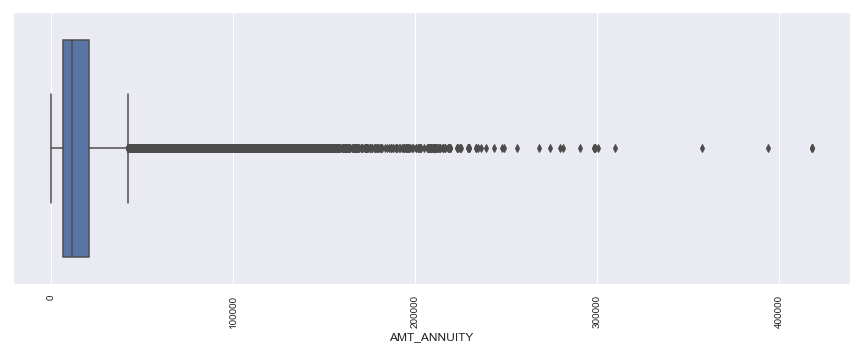

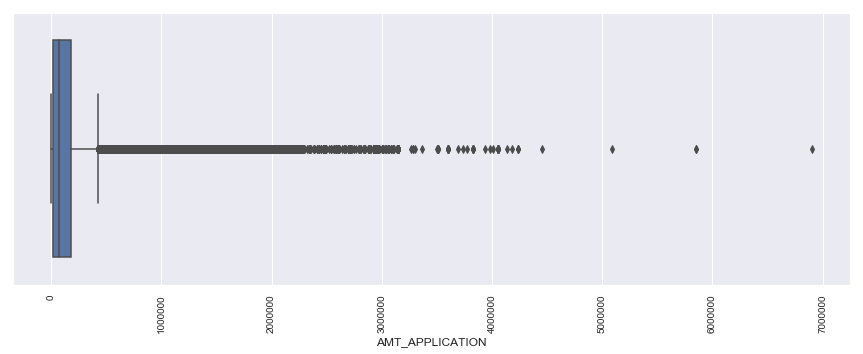

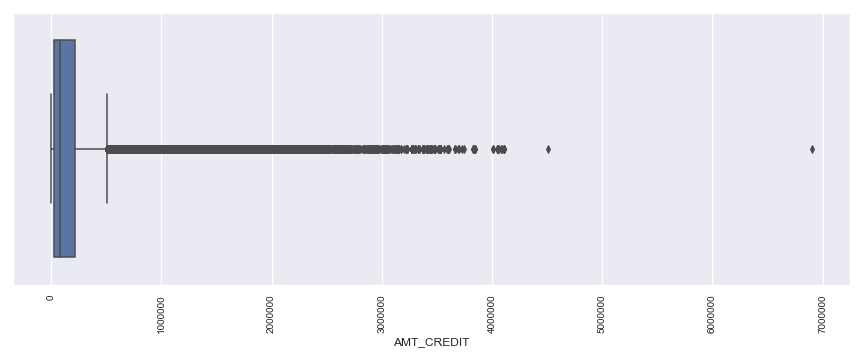

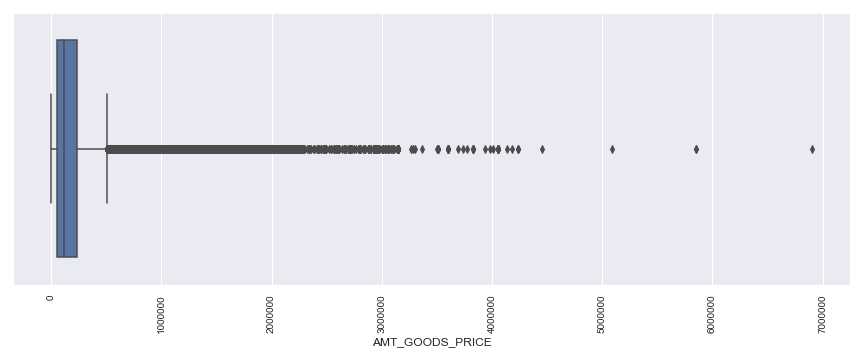

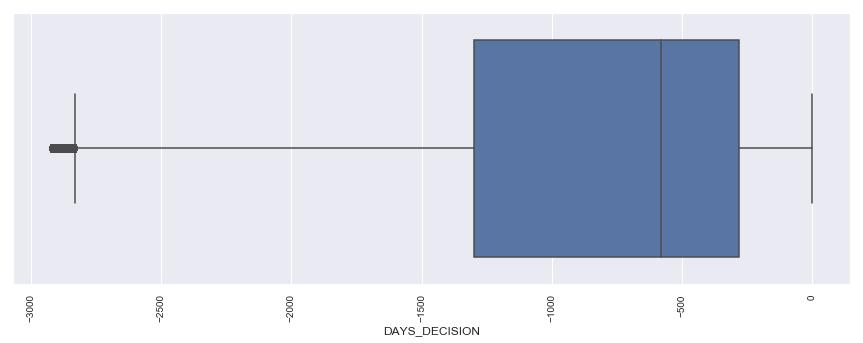

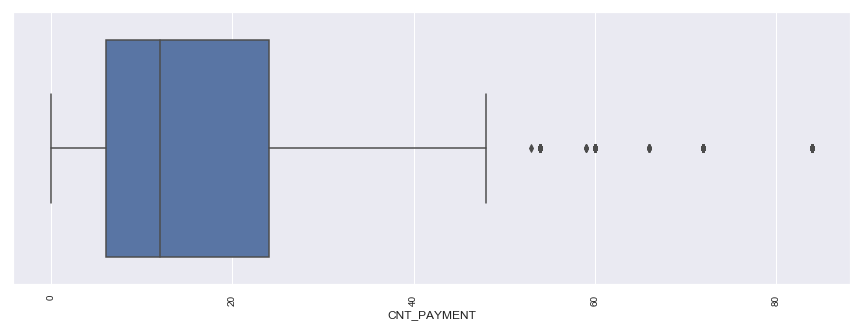

In [27]:
############################################################################
# PLOT A BOX CHART FOR THE "PREVIOUS" APPLICATION'S QUANTITATIVE VARIABLES #
############################################################################
prev_box = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT']
for i in Df2[prev_box]:
    plt.figure(1,figsize=(15,5))
    sns.boxplot(Df2[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

oUTLIERS: DAYS_DECISION -2830.0 1250.0


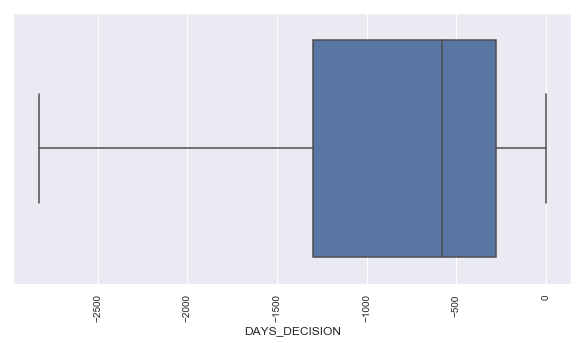

oUTLIERS: CNT_PAYMENT -21.0 51.0


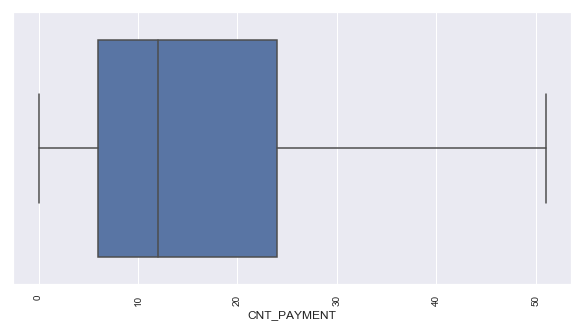

In [95]:
# DATA CLEANING
# 1B. REMOVAL OF OUTLIERS FROM PREVIOUS DATASET ('DAYS_DECISION','CNT_PAYMENT')
test_box_Df2 = ['DAYS_DECISION','CNT_PAYMENT']
new_copy = Df2[test_box_Df2]
for i in new_copy.columns:
    Q1 = new_copy[i].quantile(0.25)
    Q3 = new_copy[i].quantile(0.75)

    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR

    new_copy[i][new_copy[i] <= lower_fence] = lower_fence
    new_copy[i][new_copy[i] >= upper_fence] = upper_fence
    
    print("oUTLIERS:",i,lower_fence,upper_fence)
    
    plt.figure(1,figsize=(10,5))
    sns.boxplot(new_copy[i])
    plt.xticks(rotation =90,fontsize =10)
    plt.show()


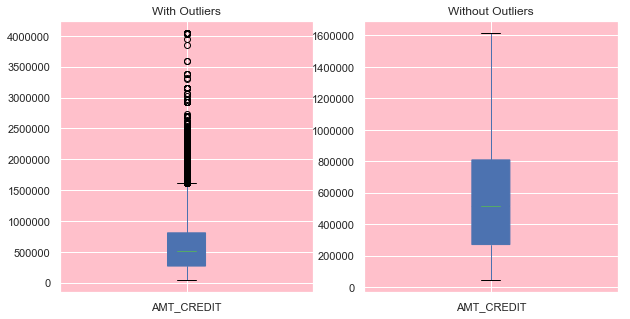

Before removing: [45000.0, 4050000.0]
After removing: [45000.0, 1616625.0]


count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [30]:
# 2A. COMPARITVE ANALYSIS OF CATEGORICAL VARIABLE (AMT_CREDIT) BEFORE
# AND AFTER CLEANING OUTLIERS IN CURRENT DATA SET

# CREATE A FIGURE
plt.figure(1, figsize = (10,5))

# CREATE A SUB PLOT 
plt.subplot(121)

# CREATE A BOX PLOT
boxplot = Df3.boxplot(['AMT_CREDIT'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('With Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

# CREATE A SUB PLOT
plt.subplot(122)

# CREATE A BOX PLOT
boxplot = new_copy.boxplot(['AMT_CREDIT'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('Without Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )
plt.show()

Df3['CODE_GENDER'].value_counts()

min = Df3['AMT_CREDIT'].describe().min()
max = Df3['AMT_CREDIT'].describe().max()
range = [min, max]
print("Before removing:",range)

min = new_copy['AMT_CREDIT'].describe().min()
max = new_copy['AMT_CREDIT'].describe().max()
range = [min, max]
print("After removing:",range)

Df3['AMT_CREDIT'].describe()

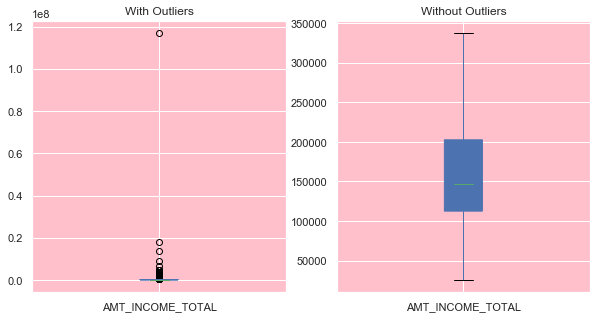

In [31]:
# 2B. COMPARITVE ANALYSIS OF QUANTITATIVE VARIABLE (AMT_INCOME_TOTAL) BEFORE
# AND AFTER CLEANING OUTLIERS

# CREATE A FIGURE
plt.figure(1, figsize = (10,5))

# CREATE A SUB PLOT 
plt.subplot(121)

# CREATE A BOX PLOT
boxplot = Df3.boxplot(['AMT_INCOME_TOTAL'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('With Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

# CREATE A SUB PLOT
plt.subplot(122)

# CREATE A BOX PLOT
boxplot = new_copy.boxplot(['AMT_INCOME_TOTAL'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('Without Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

plt.show()


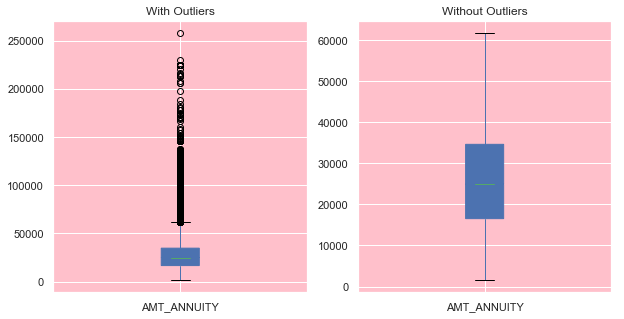

In [32]:
# 2.C COMPARITVE ANALYSIS OF QUANTITATIVE VARIABLE (AMT_ANNUITY) BEFORE
# AND AFTER CLEANING OUTLIERS

# CREATE A FIGURE
plt.figure(1, figsize = (10,5))

# CREATE A SUB PLOT 
plt.subplot(121)

# CREATE A BOX PLOT
boxplot = Df3.boxplot(['AMT_ANNUITY'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('With Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

# CREATE A SUB PLOT
plt.subplot(122)

# CREATE A BOX PLOT
boxplot = new_copy.boxplot(['AMT_ANNUITY'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('Without Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

plt.show()

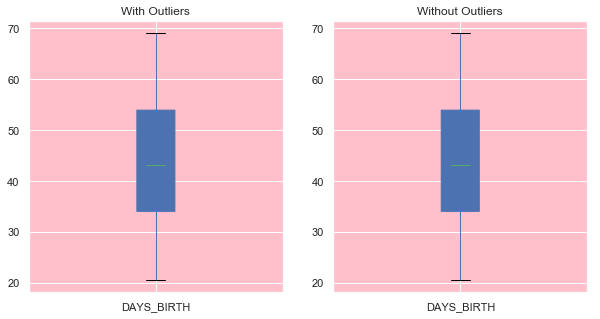

In [33]:
#2.D COMPARITVE ANALYSIS OF QUANTITATIVE VARIABLE (DAYS_BIRTH) BEFORE
# AND AFTER CLEANING OUTLIERS

# CREATE A FIGURE
plt.figure(figsize = (10,5))

# CREATE A SUB PLOT 
plt.subplot(121)

# CREATE A BOX PLOT
boxplot = Df3.boxplot(['DAYS_BIRTH'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('With Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )

# CREATE A SUB PLOT
plt.subplot(122)

# CREATE A BOX PLOT
boxplot = new_copy.boxplot(['DAYS_BIRTH'], notch=True, patch_artist=True)

# DEFINE A TITLE
boxplot.title.set_text('Without Outliers')

# DEFINE FACE COLOR TO PINK
boxplot.set(facecolor = 'pink' )
plt.show()

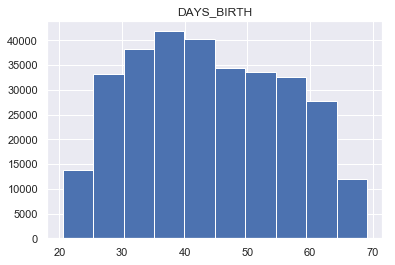

,DAYS_BIRTH
count,307511.000000
mean,43.936976
std,11.956135
min,20.520000
25%,34.010000
50%,43.150000
75%,53.920000
max,69.120000


In [100]:
#3A. UNIVAIATE ANALYSIS - SHOW THE DISTRIBUTION OF AGE
Df1_extract = Df3[['DAYS_BIRTH']]
Df1_extract.hist()
plt.show()
Df1_extract.describe()

# INFERENCE : 
# 1) THE AVERAGE AGE of a CLIENT IS AROUND 44 YEARS.
# 2) THE 


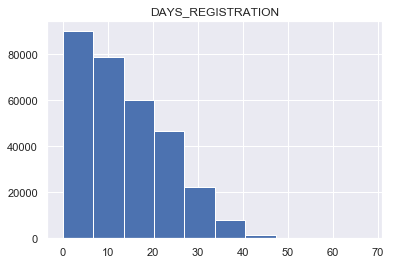

In [35]:
# UNIVAIATE ANALYSIS - SHOW THE DAYS_REGISTRATION
Df2_extract = Df3[['DAYS_REGISTRATION']]
# Binning of the continuous variables. 
Df2_extract
Df2_extract.hist()
plt.show()

Text(0.5, 1.0, 'Clients with loan payment Difficulty')

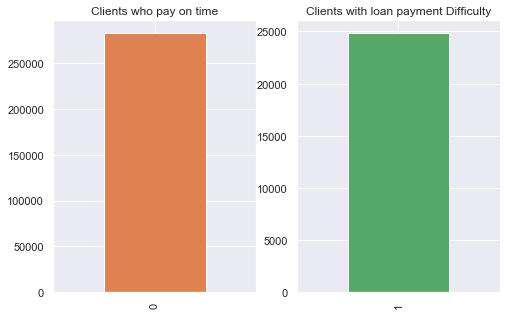

In [36]:
# SAVE THE DATASET FOR TARGET VALUES EQUAL TO 0 AND 1 IN SEPERATE VARIABLES -- RUN WHEN ERROR IS ENCOUNTERD
Df_0 = Df3[Df3['TARGET'].isin([0])]
Df_1 = Df3[Df3['TARGET'].isin([1])]

plt.figure(figsize=(8,5))
plt.subplot(121); Df_0['TARGET'].value_counts().plot(kind='bar', color = ['C1']); plt.title("Clients who pay on time")
plt.subplot(122); Df_1['TARGET'].value_counts().plot(kind='bar', color = ['C2']); plt.title("Clients with loan payment Difficulty")


In [37]:
# VALIDATE THE CLIENTS WHO HAVE DIFFICULTY IN PAYMENT (0)
Df_0.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,45.93,3.25,3.25,0.80,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,52.18,0.62,11.67,6.93,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Civil marriage,House / apartment,52.07,8.33,26.94,6.68,2.0,2,2,Business Entity Type 3


In [38]:
# VALIDATE THE CLIENTS WHO PAY ON TIME (1)
Df_1.head(3)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,25.92,1.75,9.99,5.81,1.0,2,2,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Widow,House / apartment,51.30,7.20,18.01,5.01,1.0,3,2,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Married,House / apartment,47.90,3.46,3.24,2.82,2.0,2,2,Business Entity Type 3


In [39]:
# Balancing the data check, which will help us to understand the imbalance percentage of the data sets.
# Imbalance %age = (# Rows where target=1/Toatal number of rows)*100

g = Df3['TARGET']
Df3_Imbalance = round(pd.concat([g.value_counts(),g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage')),2)
Df3_Imbalance


,counts,percentage
0,282686,91.93
1,24825,8.07


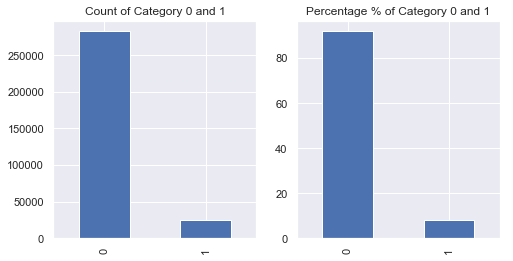

In [40]:
# PLOT THE IMBALANCE COUNT AND PERCENTAGE FOR TARGET VALUES 0 AND 1.
Df3_TARGET = Df3_Imbalance.unstack()

plt.figure(figsize=(8,4))

# PLOT THE VALUES FOR 0 AND 1 BASED ON COUNT
plt.subplot(121); Df3_TARGET['counts'].plot(kind = 'bar'); plt.title("Count of Category 0 and 1")

# PLOT THE VALUES FOR 0 AND 1 BASED ON PERCENTAGE
plt.subplot(122); Df3_TARGET['percentage'].plot(kind = 'bar'); plt.title("Percentage % of Category 0 and 1"); plt.show()

In [41]:
# Show the counts and the percentage of data in the datasets
# finding the maximum in the columns percentage here, to check how much Imbalance is there.
f1=Df3_Imbalance.diff(periods=1,axis=0)
difvalue=Df3_Imbalance[[list(Df3_Imbalance.columns)[-1]]].max()
difvalue

percentage    91.93
dtype: float64

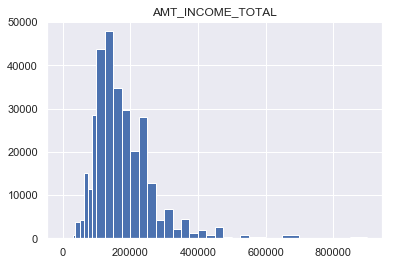

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


In [112]:
# SHOW THE DISTRIBUTION OF AMT_INCOME_TOTAL
Df3_Income = Df3[['AMT_INCOME_TOTAL']]

# DEFINE THE BINS
bins = [0, 12500, 25000, 30000, 37500, 50000, 62500, 75000, 87500, 100000, 125000, 150000, 175000, 200000,225000,250000,275000,300000,325000,350000,375000,400000,425000, 450000,475000,500000,525000,550000,600000,650000,700000,750000,800000,850000,900000]

# PLOT A HISTOGRAM TO SEE THE DISTRIBUTION OF INCOME
Df3_Income.hist(bins= bins, range=[2.565000e+04,1.170000e+08])

plt.show()
Df3_Income.describe()


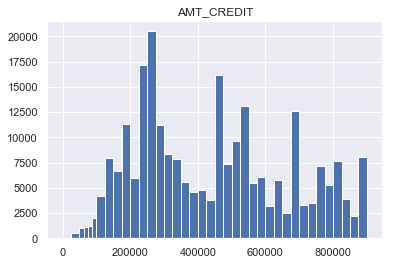

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


In [110]:
# SHOW THE DISTRIBUTION OF AMT_CREDIT
Df3_Amt_Credit = Df3[['AMT_CREDIT']]

# DEFINE THE BINS
bins = [0, 25000, 50000, 62500, 75000, 87500, 100000, 125000, 150000, 175000, 200000,225000,250000,275000,300000,325000,350000,375000,400000,425000, 450000,475000,500000,525000,550000,575000, 600000,625000, 650000,675000, 700000,725000, 750000, 775000, 800000,825000, 850000,875000, 900000]

# PLOT A HISTOGRAM TO SEE THE DISTRIBUTION OF INCOME
Df3_Amt_Credit.hist(bins= bins, range=[2.565000e+04,1.170000e+08])

plt.show()

Df3_Amt_Credit.describe()

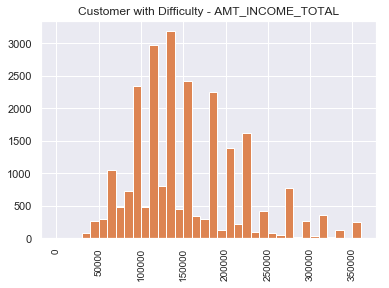

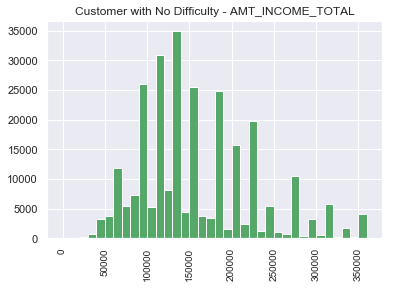

In [115]:
# 3.A. UNIVARIATE ANALYSIS - AMT_INCOME_TOTAL
Df_1_AMT_INCOME_TOTAL = Df_1[['AMT_INCOME_TOTAL']]
Df_0_AMT_INCOME_TOTAL = Df_0[['AMT_INCOME_TOTAL']]

min = Df_1_AMT_INCOME_TOTAL.describe().min();max = Df_1_AMT_INCOME_TOTAL.describe().max()
range1=[min['AMT_INCOME_TOTAL'], max['AMT_INCOME_TOTAL']]
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000 ]
Df_1_AMT_INCOME_TOTAL.hist(bins=bins, range=range1, color = ['C1']); plt.title("Customer with Difficulty - AMT_INCOME_TOTAL")
plt.xticks(rotation = 90,fontsize =10)

min = Df_0_AMT_INCOME_TOTAL.describe().min(); max = Df_0_AMT_INCOME_TOTAL.describe().max()
range2=[min['AMT_INCOME_TOTAL'], max['AMT_INCOME_TOTAL']]
Df_0_AMT_INCOME_TOTAL.hist(bins=bins, range=range2, color = ['C2']); plt.title("Customer with No Difficulty - AMT_INCOME_TOTAL")
plt.xticks(rotation = 90,fontsize =10)
plt.show()

# INFERENCE:
# MOST OF THE LOAN DEFAULTS IS FOR CLIENTS WHICH INCOME BETWEEN 112000 TO 202000 


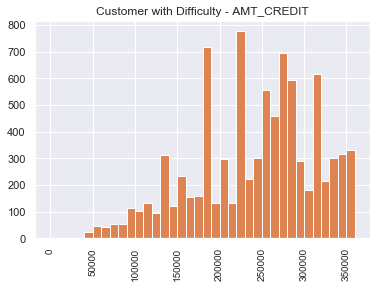

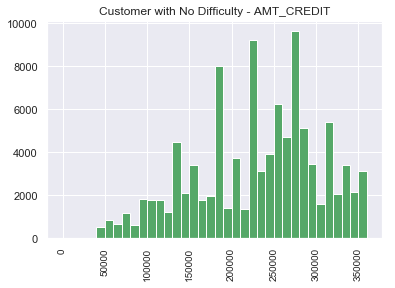

In [118]:
# 3.B. UNIVARIATE ANALYSIS - AMT_CREDIT
Df_1_AMT_CREDIT = Df_1[['AMT_CREDIT']]
Df_0_AMT_CREDIT = Df_0[['AMT_CREDIT']]
# plt.figure(figsize=(8,4))
min = Df_1_AMT_CREDIT.describe().min();max = Df_1_AMT_CREDIT.describe().max()
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000 ]
range1=[min['AMT_CREDIT'], max['AMT_CREDIT']]
Df_1_AMT_CREDIT.hist(bins=bins, range=range1, color = ['C1']); plt.title("Customer with Difficulty - AMT_CREDIT")
plt.xticks(rotation = 90,fontsize =10)

min = Df_0_AMT_CREDIT.describe().min(); max = Df_0_AMT_CREDIT.describe().max()
range2=[min['AMT_CREDIT'], max['AMT_CREDIT']]
Df_0_AMT_CREDIT.hist(bins=bins, range=range2, color = ['C2']); plt.title("Customer with No Difficulty - AMT_CREDIT")
plt.xticks(rotation = 90,fontsize =10)
plt.show()

# INFERENCE:
# MOST OF THE LOAN DEFAULTS IS FOR CLIENTS WHICH INCOME BETWEEN 285000 TO 733000 lOAN AMOUNTS 


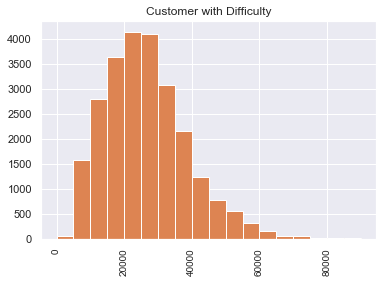

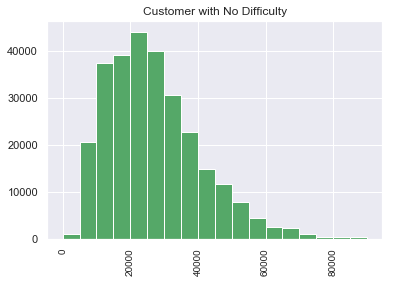

In [120]:
# 3.C. UNIVARIATE ANALYSIS - AMT_ANNUITY
Df_1_AMT_ANNUITY = Df_1[['AMT_ANNUITY']]
Df_0_AMT_ANNUITY = Df_0[['AMT_ANNUITY']]
# plt.figure(figsize=(8,4))
min = Df_1_AMT_ANNUITY.describe().min();max = Df_1_AMT_ANNUITY.describe().max()
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]
range1=[min['AMT_ANNUITY'], max['AMT_ANNUITY']]
Df_1_AMT_ANNUITY.hist(bins=bins, range=range1, color = ['C1']); plt.title("Customer with Difficulty")
plt.xticks(rotation = 90,fontsize =10)

min = Df_0_AMT_ANNUITY.describe().min(); max = Df_0_AMT_ANNUITY.describe().max()
range2=[min['AMT_ANNUITY'], max['AMT_ANNUITY']]
Df_0_AMT_ANNUITY.hist(bins=bins, range=range2, color = ['C2']); plt.title("Customer with No Difficulty")
plt.xticks(rotation = 90,fontsize =10)
plt.show()


# INFERENCE:
# MOST OF THE LOAN DEFAULTS IS FOR CLIENTS WHOSE ANNUITY IS BETWEEN 24000 TO 26000.


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

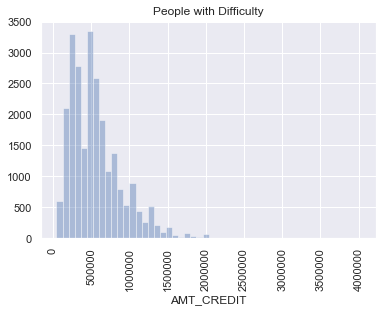

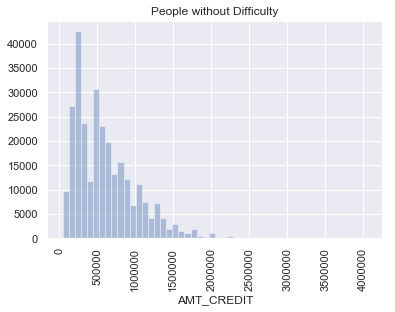

In [88]:
# KEEP IF NEEDED
#DISTRIBUTION OF APPROVED CREDIT WITH 
sns.distplot(Df_1_AMT_CREDIT['AMT_CREDIT'], kde=False).set_title("People with Difficulty")
plt.xticks(rotation='vertical');plt.show()
sns.distplot(Df_0_AMT_CREDIT['AMT_CREDIT'], kde=False).set_title("People without Difficulty")
plt.xticks(rotation='vertical');plt.show()

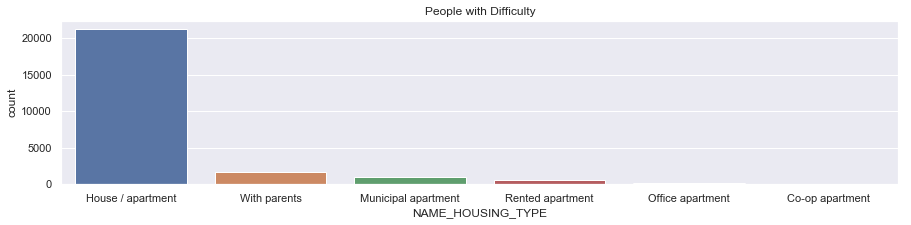

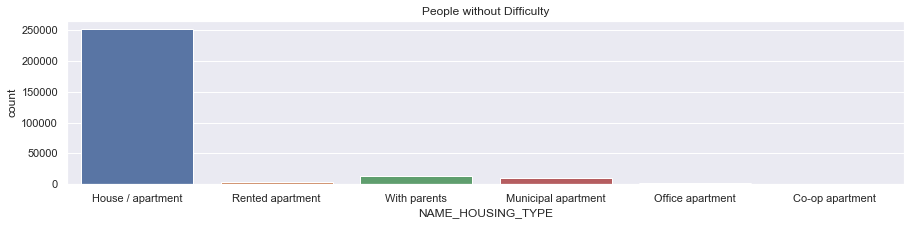

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')

In [50]:
# SEGMENTED UNIVARIATE UNIVARIATE ANALYSIS 
# DISTRIBUTION OF BASED ON HOUSING TYPE

# PEOPLE WITH DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_1['NAME_HOUSING_TYPE']).set_title("People with Difficulty")
plt.show()

# PEOPLE WITHOUT DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_0['NAME_HOUSING_TYPE']).set_title("People without Difficulty")
plt.show()
Df_0.columns

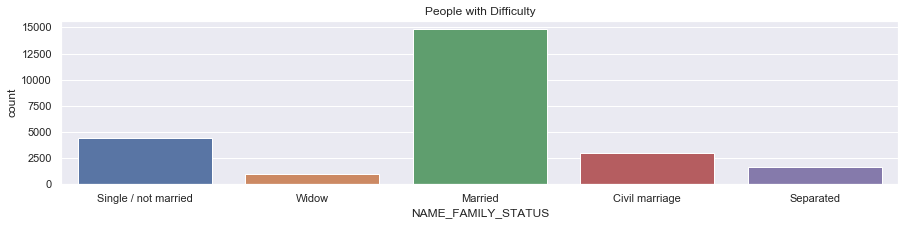

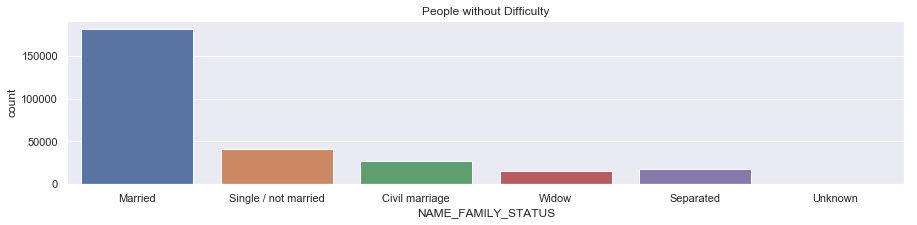

In [51]:
# SEGMENTED UNIVARIATE UNIVARIATE ANALYSIS 
# DISTRIBUTION OF BASED ON FAMILY TYPE

# PEOPLE WITH DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_1['NAME_FAMILY_STATUS']).set_title("People with Difficulty")
plt.show()

# PEOPLE WITHOUT DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_0['NAME_FAMILY_STATUS']).set_title("People without Difficulty")
plt.show()


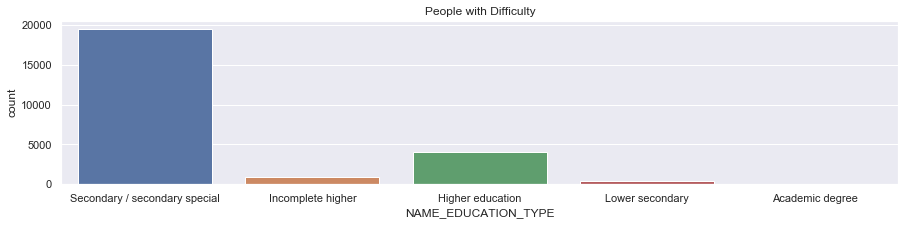

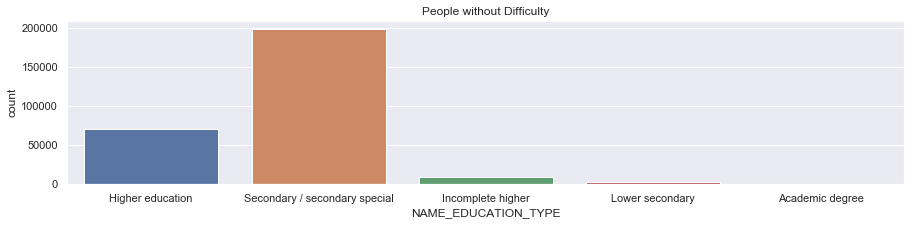

In [52]:
# SEGMENTED UNIVARIATE UNIVARIATE ANALYSIS 
# DISTRIBUTION OF BASED ON EDUCATION

# PEOPLE WITH DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_1['NAME_EDUCATION_TYPE']).set_title("People with Difficulty")
plt.show()

# PEOPLE WITHOUT DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_0['NAME_EDUCATION_TYPE']).set_title("People without Difficulty")
plt.show()


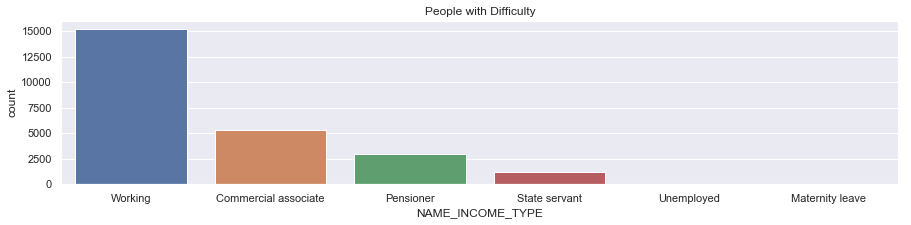

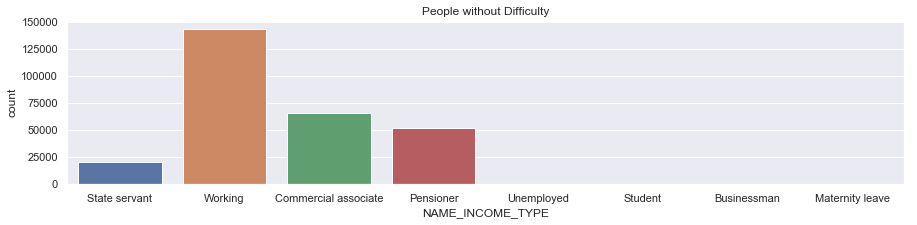

In [53]:
# SEGMENTED UNIVARIATE UNIVARIATE ANALYSIS 
# DISTRIBUTION OF BASED ON INCOME

# PEOPLE WITH DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_1['NAME_INCOME_TYPE']).set_title("People with Difficulty")
plt.show()

# PEOPLE WITHOUT DIFFICULTY
plt.figure(figsize=(15,3))
sns.countplot(Df_0['NAME_INCOME_TYPE']).set_title("People without Difficulty")
plt.show()

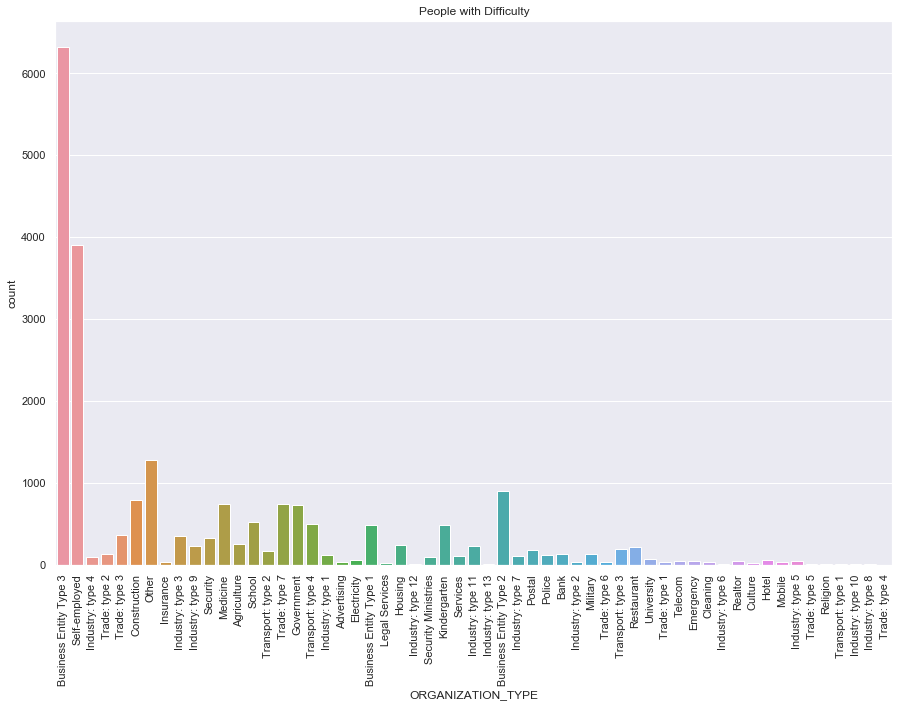

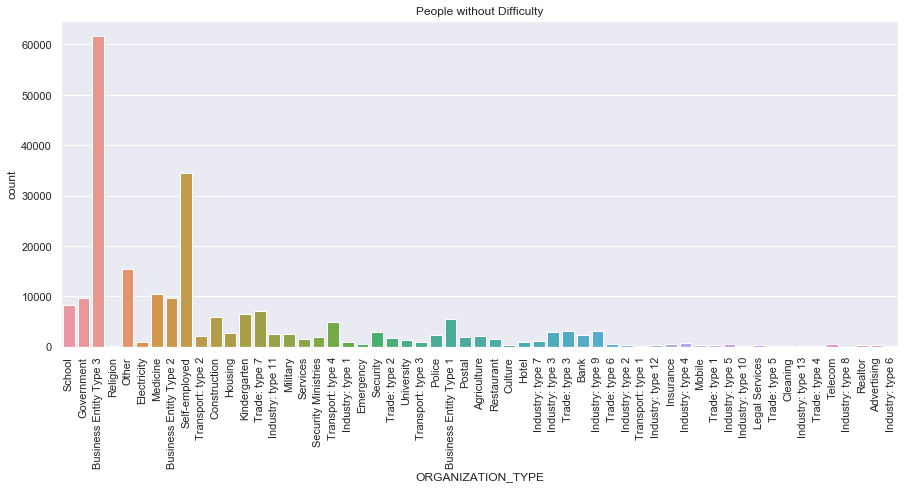

In [54]:
# SEGMENTED UNIVARIATE UNIVARIATE ANALYSIS 
# DISTRIBUTION OF BASED ON ORGANIZATION_TYPE

Df_1['ORGANIZATION_TYPE'] = Df_1['ORGANIZATION_TYPE'][Df_1['ORGANIZATION_TYPE'] != "XNA"]
Df_1['ORGANIZATION_TYPE']

# PEOPLE WITH DIFFICULTY
plt.figure(figsize=(15,10))
sns.countplot(Df_1['ORGANIZATION_TYPE']).set_title("People with Difficulty");plt.xticks(rotation='vertical')
plt.show()

# PEOPLE WITHOUT DIFFICULTY
Df_0_org = Df_0[['ORGANIZATION_TYPE']]

# DROP "XNA" VALUES AS IT IS EQUIVALENT TO NULL VALUE
Df_0_org['ORGANIZATION_TYPE'] = Df_0_org['ORGANIZATION_TYPE'][Df_0_org['ORGANIZATION_TYPE'] != "XNA"]
# DROP NULL VALUES
Df_0_org.dropna(axis=0, inplace=True)
Df_0_org
plt.figure(figsize=(15,6))
sns.countplot(Df_0_org['ORGANIZATION_TYPE']).set_title("People without Difficulty");plt.xticks(rotation='vertical')
plt.show()


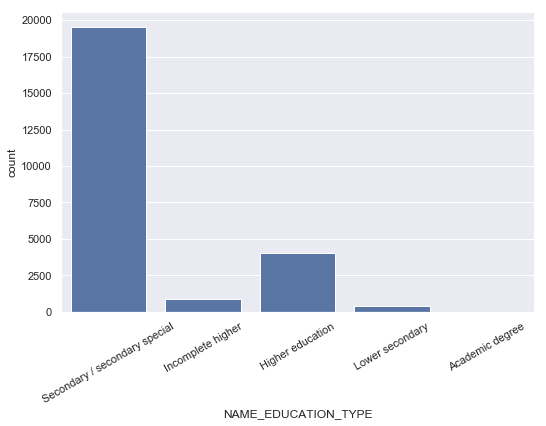

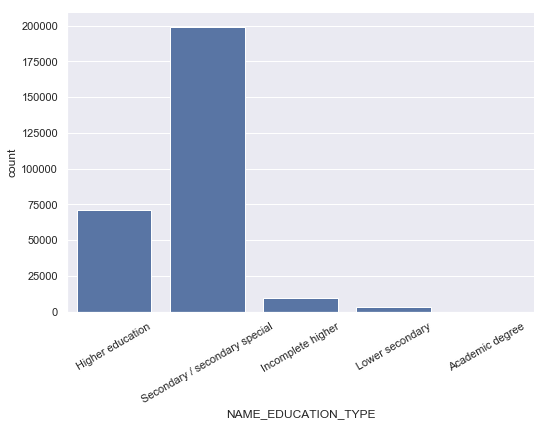

In [55]:
# UNIVARIATE ANALYSIS
C_IT = sns.catplot("NAME_EDUCATION_TYPE", data=Df_1, aspect=1.5, kind="count", color="b")
C_IT.set_xticklabels(rotation=30)
plt.show()

C_IT = sns.catplot("NAME_EDUCATION_TYPE", data=Df_0, aspect=1.5, kind="count", color="b")
C_IT.set_xticklabels(rotation=30)
plt.show()

<Figure size 1800x1800 with 0 Axes>

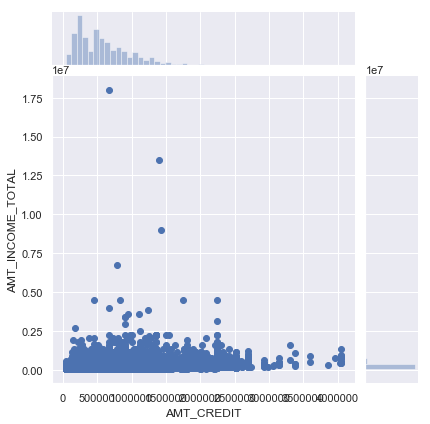

In [56]:
# BIVARIATE ANALYSIS

# JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL
plt.figure(figsize=(25,25))
sns.jointplot('AMT_CREDIT','AMT_INCOME_TOTAL', Df_0);plt.xticks(rotation='horizontal')
plt.show()

<Figure size 1800x1800 with 0 Axes>

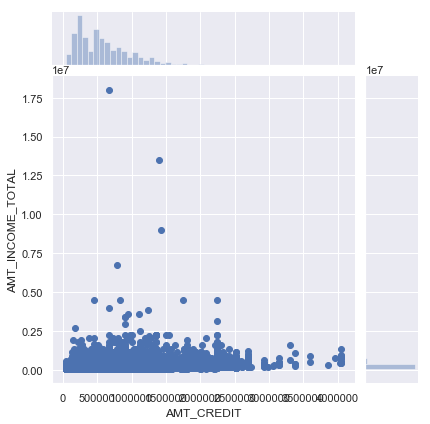

In [57]:
# BIVARIATE ANALYSIS

# JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL
plt.figure(figsize=(25,25))
sns.jointplot('AMT_CREDIT','AMT_INCOME_TOTAL', Df_0);plt.xticks(rotation='horizontal')
plt.show()

<Figure size 1800x1800 with 0 Axes>

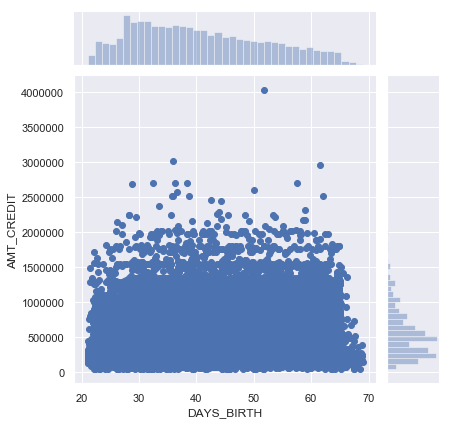

<Figure size 1800x1800 with 0 Axes>

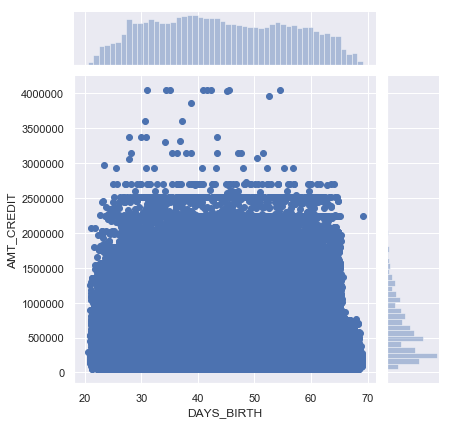

In [58]:
# JOINT PLOT between DAYS_BIRTH AND AMT_CREDIT
plt.figure(figsize=(25,25))
sns.jointplot('DAYS_BIRTH','AMT_CREDIT', Df_1);plt.xticks(rotation='vertical')
plt.show()

# JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL
plt.figure(figsize=(25,25))
sns.jointplot('DAYS_BIRTH','AMT_CREDIT', Df_0);plt.xticks(rotation='vertical')
plt.show()

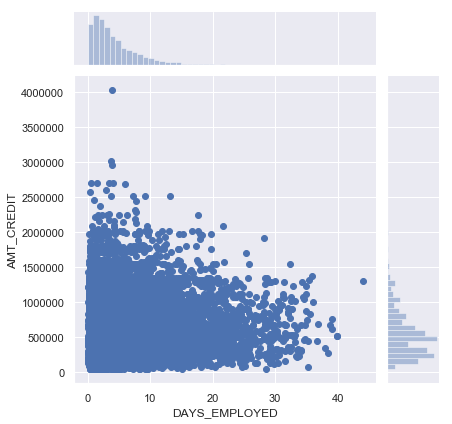

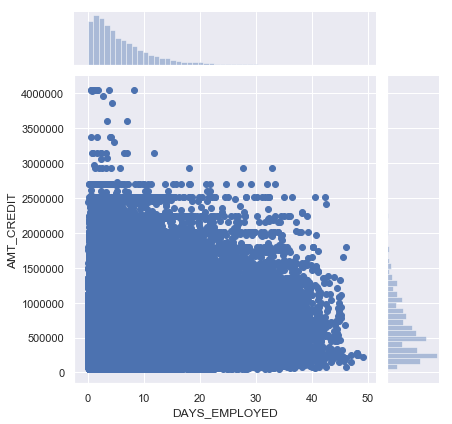

In [59]:
# BIVARIATE ANALYSIS
# JOINT PLOT between DAYS_EMPLOYED AND AMT_CREDIT


Df_1_DE = Df_1[['DAYS_EMPLOYED','AMT_CREDIT']]
Df_0_DE = Df_0[['DAYS_EMPLOYED','AMT_CREDIT']]

# PEOPLE WITHOUT DIFFICULTY
# DROP "1000.67" VALUES AS IT IS EQUIVALENT TO NULL VALUE
Df_1_DE['DAYS_EMPLOYED'] = Df_1_DE['DAYS_EMPLOYED'][Df_1_DE['DAYS_EMPLOYED'] != 1000.67]

# DROP NULL VALUES
Df_1_DE.dropna(axis=0, inplace=True)
Df_1_DE

sns.jointplot('DAYS_EMPLOYED','AMT_CREDIT', Df_1_DE);plt.xticks(rotation='vertical')
plt.show()

# PEOPLE WITH DIFFICULTY
# DROP "1000.67" VALUES AS IT IS EQUIVALENT TO NULL VALUE
Df_0_DE['DAYS_EMPLOYED'] = Df_0_DE['DAYS_EMPLOYED'][Df_0_DE['DAYS_EMPLOYED'] != 1000.67]

# DROP NULL VALUES
Df_0_DE.dropna(axis=0, inplace=True)
Df_0_DE

# JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL

sns.jointplot('DAYS_EMPLOYED','AMT_CREDIT', Df_0_DE);plt.xticks(rotation='vertical')
plt.show()

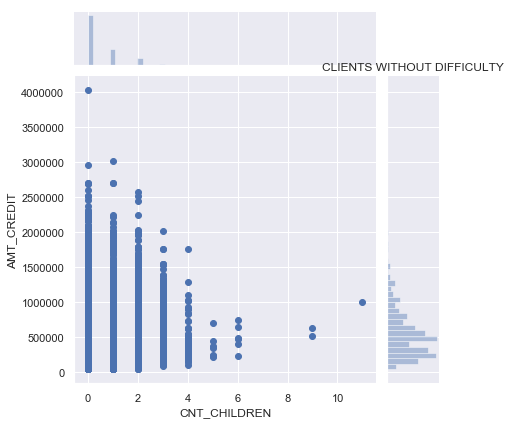

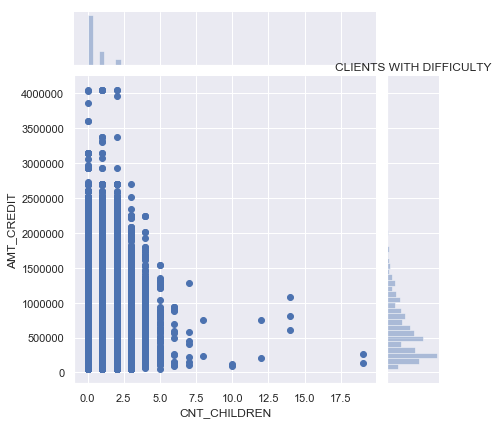

In [60]:
# JOINT PLOT between CNT_CHILDREN AND AMT_CREDIT

Df_1_CC = Df_1[['CNT_CHILDREN','AMT_CREDIT']]
Df_0_CC = Df_0[['CNT_CHILDREN','AMT_CREDIT']]

# PEOPLE WITHOUT DIFFICULTY
# DROP NULL VALUES
Df_1_CC.dropna(axis=0, inplace=True)

sns.jointplot('CNT_CHILDREN','AMT_CREDIT', Df_1_CC);plt.xticks(rotation='vertical')
plt.title("CLIENTS WITHOUT DIFFICULTY")
plt.show()

# PEOPLE WITH DIFFICULTY
# DROP NULL VALUES
Df_0_CC.dropna(axis=0, inplace=True)

# JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL

sns.jointplot('CNT_CHILDREN','AMT_CREDIT', Df_0_CC);plt.xticks(rotation='vertical')
plt.title("CLIENTS WITH DIFFICULTY")
plt.show()


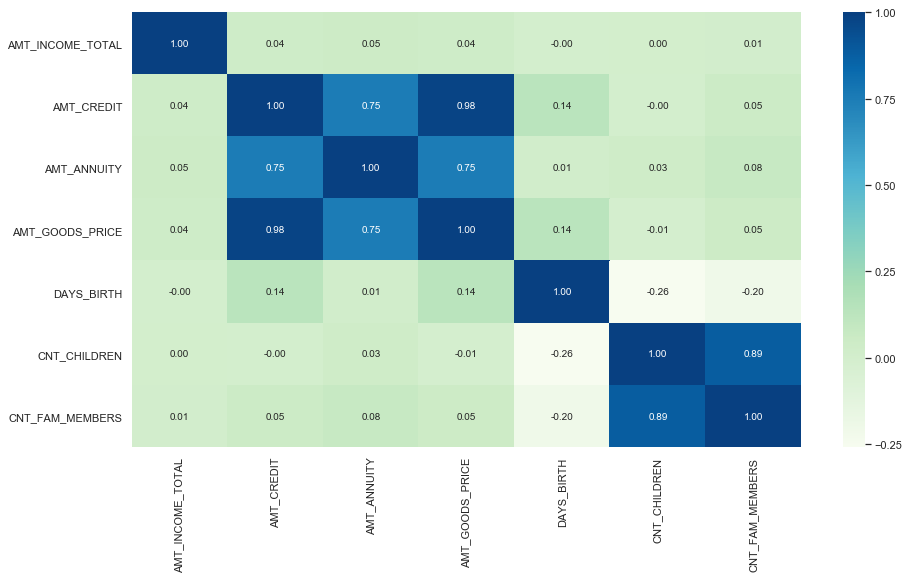

In [61]:
# HEAT MAP - TO TEST CORRELATION BETWEEN CRITICAL QUANTIATIVE VALUES
# IN THE CURRENT APPLICATION SET FOR CLIENTS HAVING DIFFICULTY IN PAYMENT
test=Df_1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH','CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(test,annot = True, fmt = ".2f", cmap = "GnBu")
plt.show()


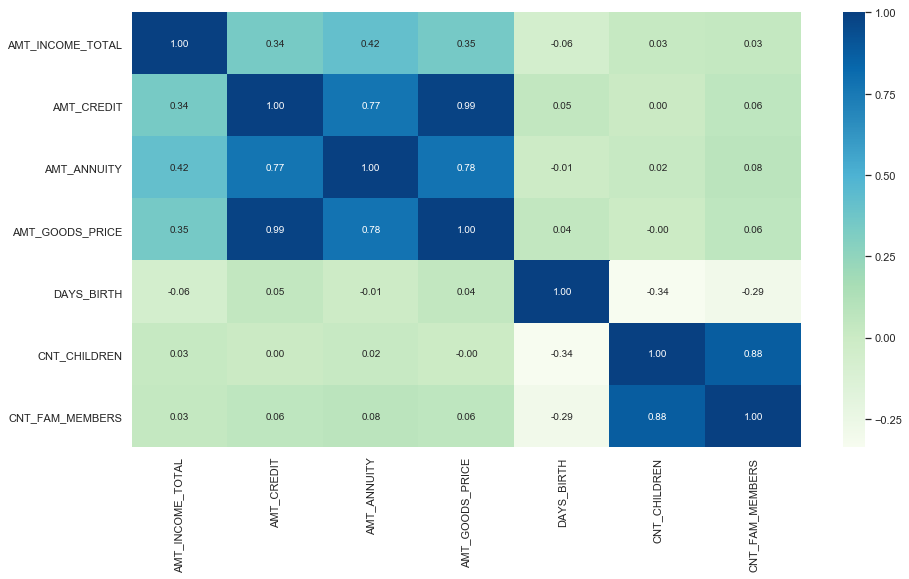

In [62]:
# HEAT MAP - TO TEST CORRELATION BETWEEN CRITICAL QUANTIATIVE VALUES
# IN THE CURRENT APPLICATION SET FOR CLIENTS WHO PAY ON TIME

test=Df_0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH','CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(test,annot = True, fmt = ".2f", cmap = "GnBu")
plt.show()

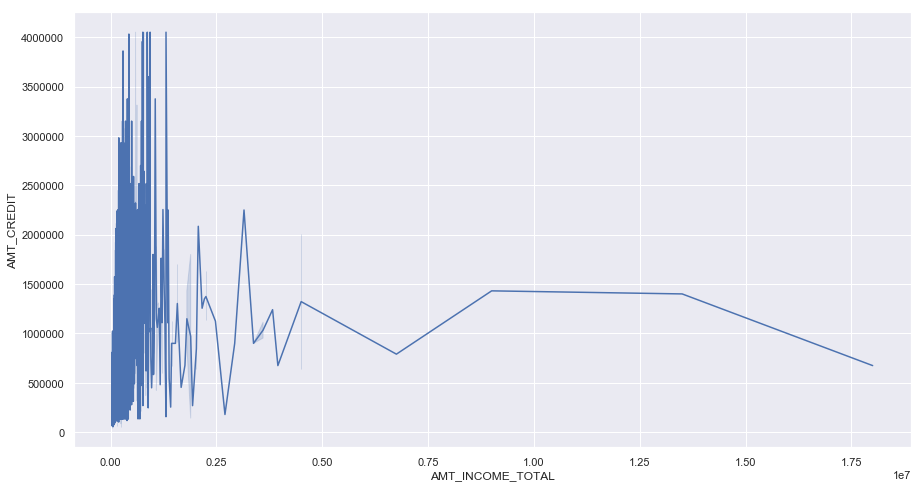

In [63]:
# BIVARIATE 
plt.figure(figsize=(15,8))
sns.lineplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=Df_0)
plt.show()

In [64]:
# BIVARIATE ANALYSIS FOR PREVIOUS Application Data
Df_prev = PreviousApplication_data

# LIST DOWN THE COLUMNS
Df_prev.columns

# FIND THE NAN VALUE % IN EACH COLUMN
round(Df_prev.isnull().mean(axis=0).sort_values(ascending=False)*100,2)
Df_prev.columns


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [65]:
# List the cells having less than 55% NAN values and store it to variable in descending order.
Df_prev = PreviousApplication_data.loc[:,round(PreviousApplication_data.isnull().mean().sort_values(ascending=False)*100) < 60]

# List the columns and its mean percentage (%) of NAN values
round(Df_prev.isnull().mean(axis=0).sort_values(ascending=False)*100,2)

# MISCELLANEOUS COLUMNS THAT WILL BE DROPPED
prev_to_drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
                'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

# DROP THE COLUMNS THAT NEEDS TO BE EXCLUDED FROM ANALYSIS
Df_prev = Df_prev.drop(prev_to_drop, axis=1)

# LIST THE COLUMN NAMES IN THE CURRENT APPLICATION AFTER DROPPING COLUMNS
Df_prev.columns

# CHANGE NEGATIVE VALUE TO ABSOLUTE VALUE
Df_prev['DAYS_DECISION'] = round(Df_prev['DAYS_DECISION'].abs(),2).head(15)
Df_prev.head(5)

Df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

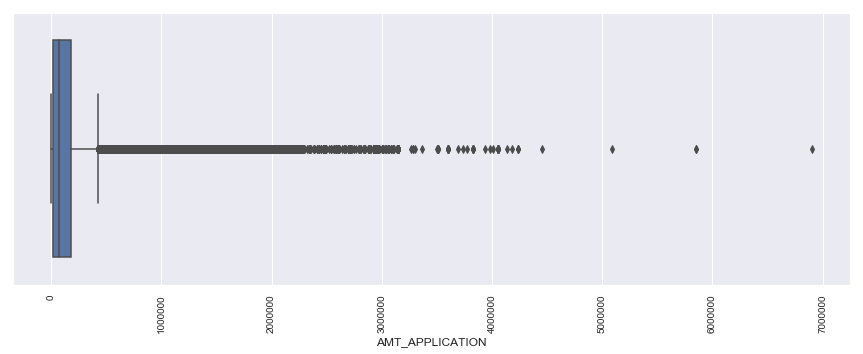

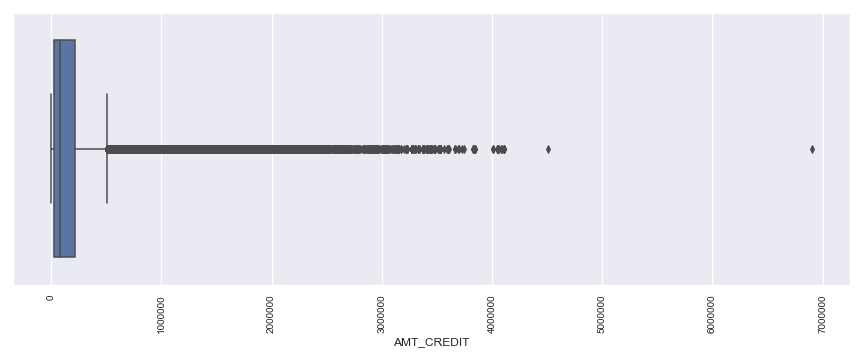

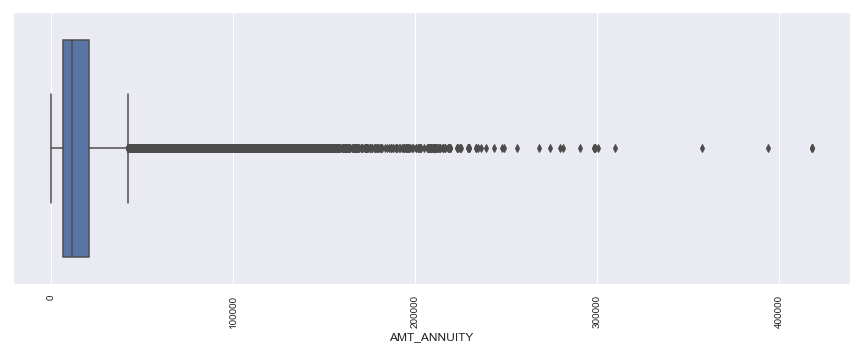

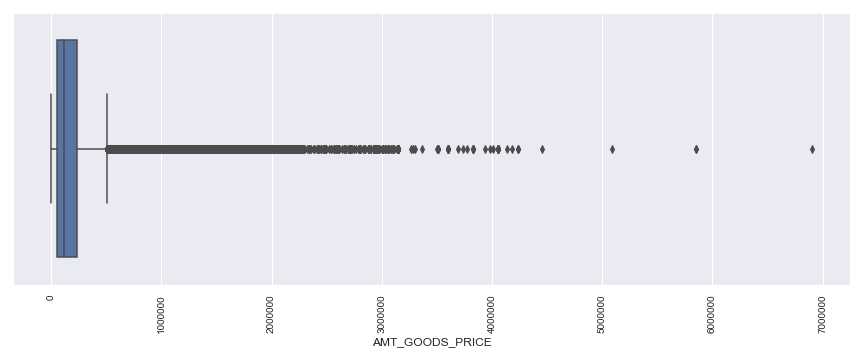

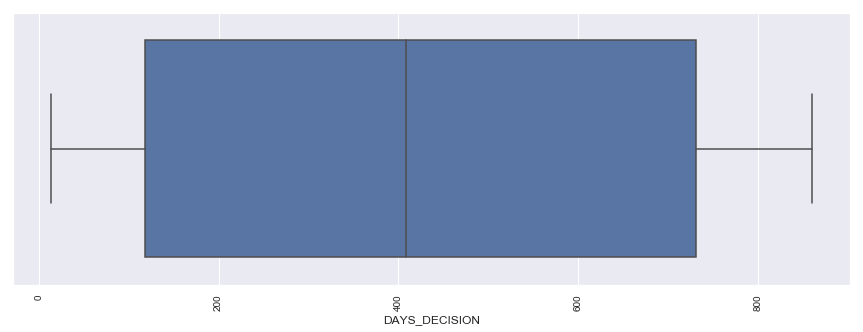

In [66]:
# PLOT A BOX CHART FOR THE CURRENT APPLICATION'S QUANTITATIVE VARIABLES TO SEE THE OUTLIERS
prev_box_2 = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_DECISION']
for i in Df_prev[prev_box_2]:
    plt.figure(1,figsize=(15,5))
    sns.boxplot(Df_prev[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

-223740.0 422820.0


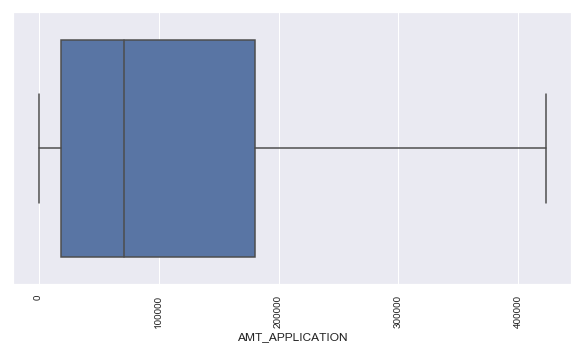

-264226.5 504805.5


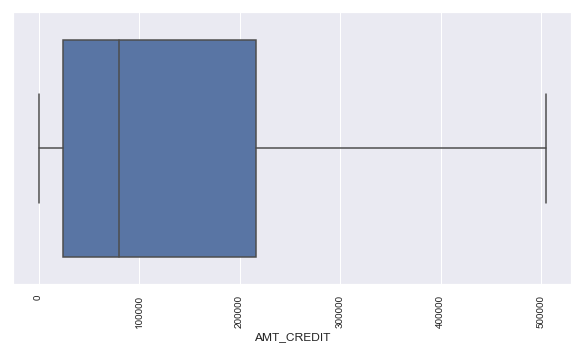

-15183.18 42163.38


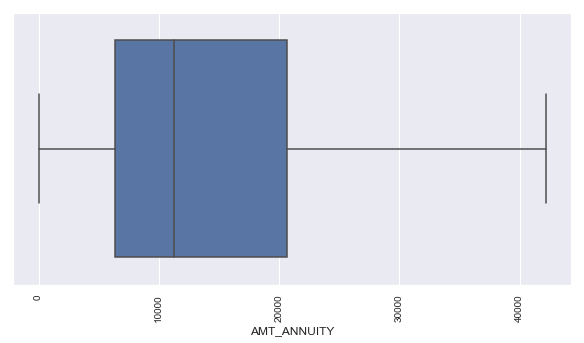

-223897.5 508738.5


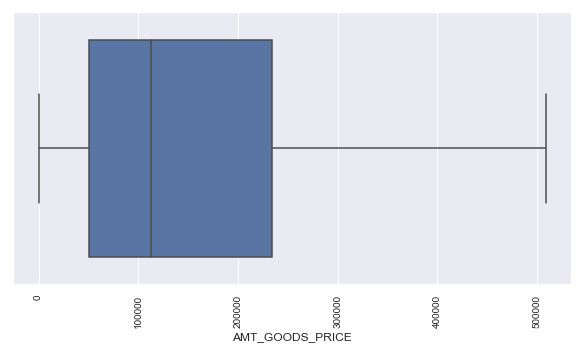

-799.5 1648.5


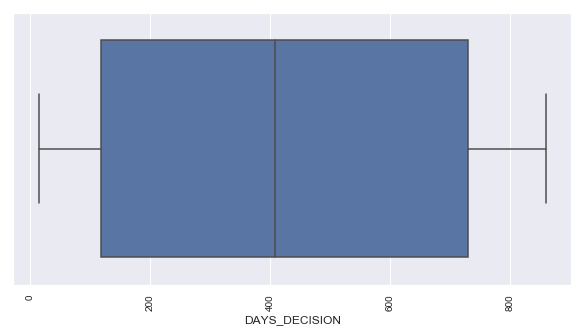

In [67]:
# DATA CLEANSING
# REMOVE OF OUTLIERS FROM PREVIOUS DATASET 
prev_box_Df2 = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_DECISION']
clean_prev_Df2 = Df_prev[prev_box_Df2]
for i in clean_prev_Df2.columns:
    Q1 = clean_prev_Df2[i].quantile(0.25)
    Q3 = clean_prev_Df2[i].quantile(0.75)

    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR

    clean_prev_Df2[i][clean_prev_Df2[i] <= lower_fence] = lower_fence
    clean_prev_Df2[i][clean_prev_Df2[i] >= upper_fence] = upper_fence
    
    print(lower_fence,upper_fence)
    
    plt.figure(1,figsize=(10,5))
    sns.boxplot(clean_prev_Df2[i])
    plt.xticks(rotation =90,fontsize =10)
    plt.show()


In [68]:
# CLEANED DATA COLUMNS FROM PREVIOUS APPLICATION
print(clean_prev_Df2.columns)

# CLEANED DATA FROM PREVIOUS APPLICATION
clean_prev_Df2.head(4)

Index(['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_DECISION'],
      dtype='object')


,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_DECISION
0,17145.0,17145.0,1730.430,17145.0,73.0
1,422820.0,504805.5,25188.615,508738.5,164.0
2,112500.0,136444.5,15060.735,112500.0,301.0
3,422820.0,470790.0,42163.380,450000.0,512.0


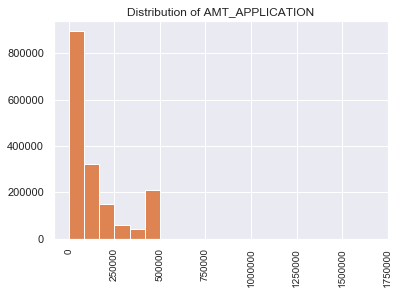

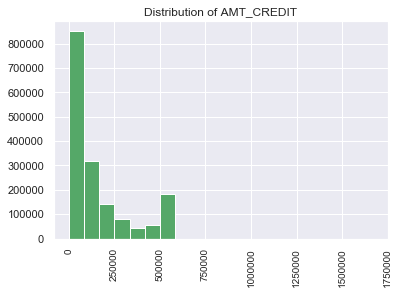

In [69]:
# UNIVARIATE ANALYSIS - AMT_APPLICATION
clean_prev_Df_AMT_APPLICATION = clean_prev_Df2[['AMT_APPLICATION']]

min = clean_prev_Df_AMT_APPLICATION.describe().min();max = clean_prev_Df_AMT_APPLICATION.describe().max()
range1=[min['AMT_APPLICATION'], max['AMT_APPLICATION']]
clean_prev_Df_AMT_APPLICATION.hist(bins=20, range=range1, color = ['C1']); plt.title("Distribution of AMT_APPLICATION")
plt.xticks(rotation = 90,fontsize =10)
plt.show()

# UNIVARIATE ANALYSIS - AMT_CREDIT
clean_prev_Df_AMT_CREDIT = clean_prev_Df2[['AMT_CREDIT']]
min = clean_prev_Df_AMT_CREDIT.describe().min();max = clean_prev_Df_AMT_CREDIT.describe().max()
range1=[min['AMT_CREDIT'], max['AMT_CREDIT']]
clean_prev_Df_AMT_CREDIT.hist(bins=20, range=range1, color = ['C2']); plt.title("Distribution of AMT_CREDIT")
plt.xticks(rotation = 90,fontsize =10)
plt.show()

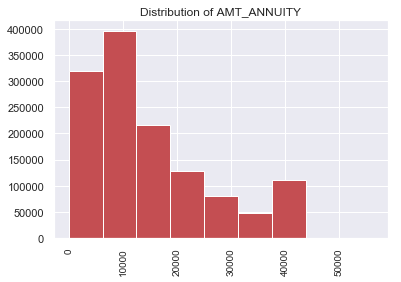

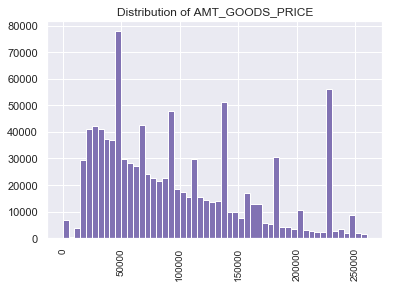

In [70]:
# UNIVARIATE ANALYSIS - AMT_ANNUITY
clean_prev_Df_AMT_ANNUITY = clean_prev_Df2[['AMT_ANNUITY']]

min = clean_prev_Df_AMT_ANNUITY.describe().min();max = clean_prev_Df_AMT_ANNUITY.describe().max()
range1=[min['AMT_ANNUITY'], max['AMT_ANNUITY']]
bins1=[0,6250, 12500, 18750, 25000,31250, 37500, 43750, 50000, 56250]
clean_prev_Df_AMT_ANNUITY.hist(bins=bins1, range=range1, color = ['C3']); plt.title("Distribution of AMT_ANNUITY")
plt.xticks(rotation = 90,fontsize =10)
plt.show()

# UNIVARIATE ANALYSIS - AMT_GOODS_PRICE
clean_prev_Df_AMT_GOODS_PRICE = clean_prev_Df2[['AMT_GOODS_PRICE']]
bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000,110000,115000,120000,125000, 130000,135000,140000,145000, 150000, 155000, 160000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 250000, 255000,260000]
min = clean_prev_Df_AMT_GOODS_PRICE.describe().min();max = clean_prev_Df_AMT_GOODS_PRICE.describe().max()
range1=[min['AMT_GOODS_PRICE'], max['AMT_GOODS_PRICE']]
clean_prev_Df_AMT_GOODS_PRICE.hist(bins=bins, range=range1, color = ['C4']); plt.title("Distribution of AMT_GOODS_PRICE")
plt.xticks(rotation = 90,fontsize =10)
plt.show()


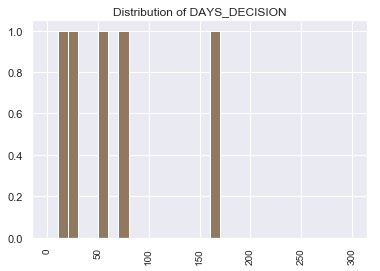

In [71]:
# UNIVARIATE ANALYSIS - DAYS_DECISION
clean_prev_Df_DAYS_DECISION = abs(clean_prev_Df2[['DAYS_DECISION']])
min = clean_prev_Df_DAYS_DECISION.describe().min();max = clean_prev_Df_DAYS_DECISION.describe().max()
bins1=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220, 230, 240,250,260,270,280,290,300]
range1=[min['DAYS_DECISION'], max['DAYS_DECISION']]
clean_prev_Df_DAYS_DECISION.hist(bins=bins1, range=range1, color = ['C5']); plt.title("Distribution of DAYS_DECISION")
plt.xticks(rotation = 90,fontsize =10)
plt.show()


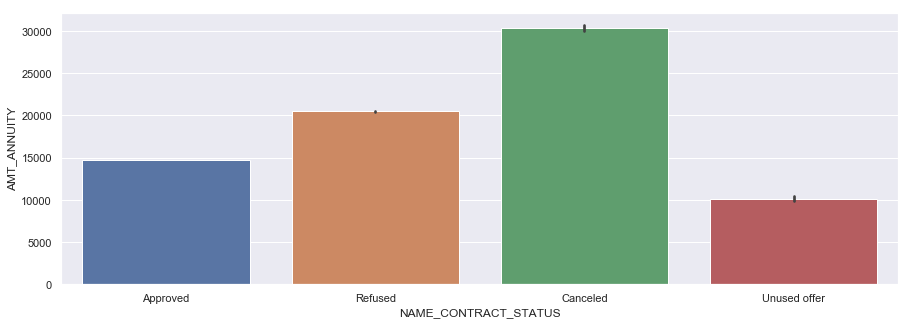

In [72]:
# BIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA BASED ON CONTRACT_STATUS
plt.figure(figsize=(15,5))
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_ANNUITY",  data=Df_prev)
plt.show()

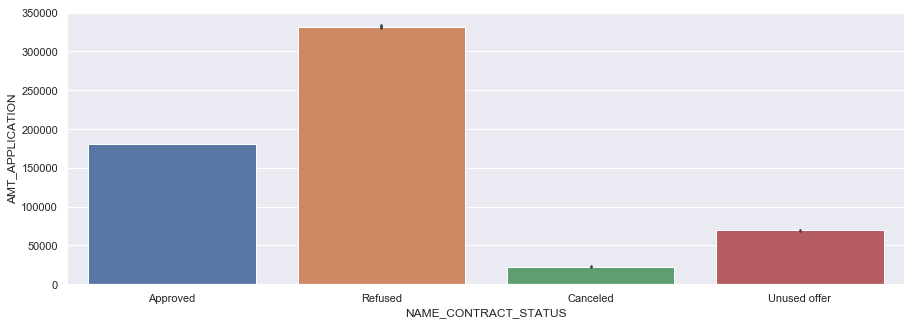

In [73]:
# BIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA BASED ON CONTRACT_STATUS

plt.figure(figsize=(15,5))
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_APPLICATION",  data=Df_prev)
plt.show()


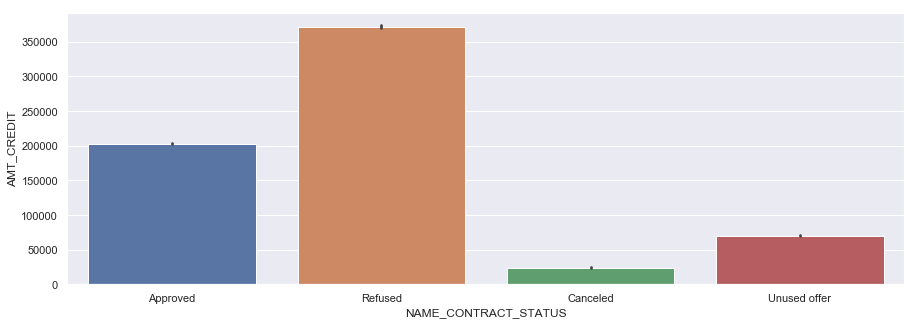

In [74]:
# BIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA BASED ON CONTRACT_STATUS

plt.figure(figsize=(15,5))
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT",  data=Df_prev)
plt.show()

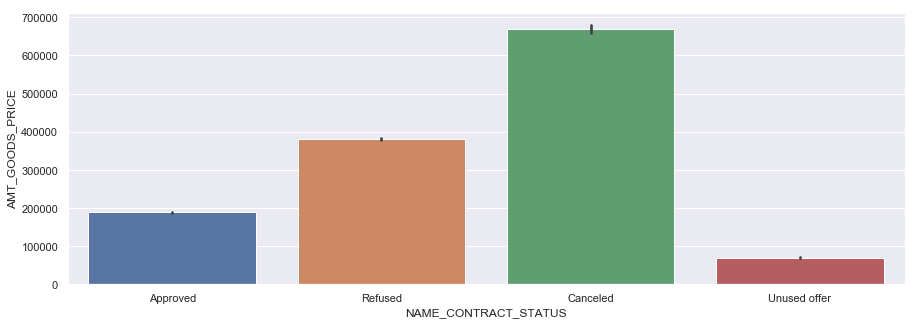

(316319, 1670214, 18.94)

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_GOODS_PRICE",  data=Df_prev)
plt.show()

Tot_contract_status = Df_prev['NAME_CONTRACT_STATUS'].shape[0]
Can_length = len(Df_prev['NAME_CONTRACT_STATUS'][Df_prev['NAME_CONTRACT_STATUS'] == "Canceled"])
Can_length_pct = round((Can_length/Tot_contract_status)*100,2)
Can_length_pct
Can_length,Tot_contract_status,Can_length_pct

# INFERENCE: 19% of loans have been cancelled by the customer.

In [76]:
Tot_contract_status = Df_prev['NAME_CONTRACT_STATUS'].shape[0]
Can_length = len(Df_prev['NAME_CONTRACT_STATUS'][Df_prev['NAME_CONTRACT_STATUS'] == "Canceled"])
Can_length_pct = round((Can_length/Tot_contract_status)*100,2)
Can_length_pct
Can_length,Tot_contract_status,Can_length_pct

(316319, 1670214, 18.94)

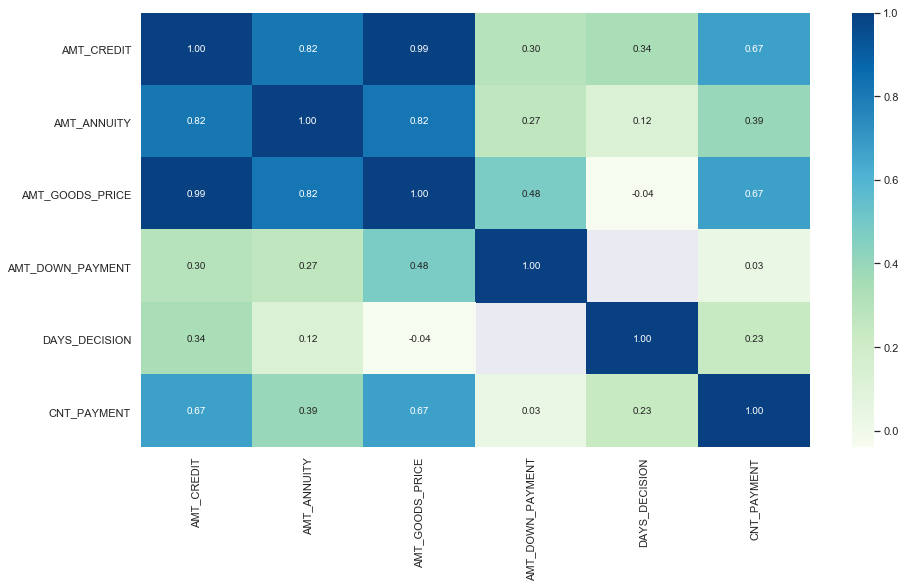

In [77]:
# HEAT MAP - TO TEST CORRELATION BETWEEN CRITICAL QUANTIATIVE VALUES
# IN THE PREVIOUS APPLICATION SET FOR CLIENTS WHO PAY ON TIME

test=Df_prev[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT','DAYS_DECISION','CNT_PAYMENT']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(test,annot = True, fmt = ".2f", cmap = "GnBu")
plt.show()

# INFERENCE : The loan amount sanctioned has a strong correlation with the AMT_GOODS_PRICE and AMT_ANNUITY

In [78]:
Df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

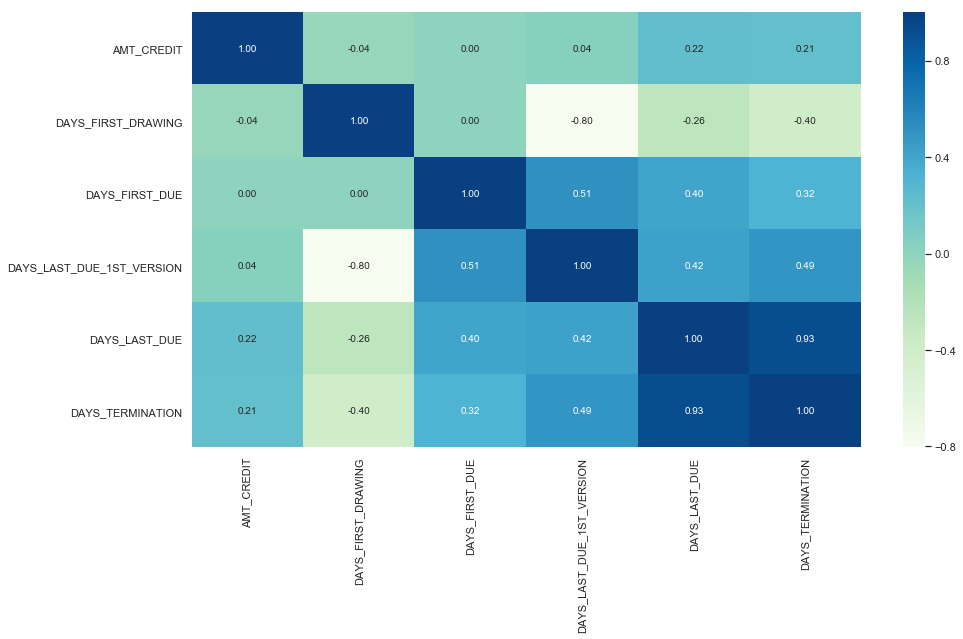

In [79]:
# HEAT MAP - TO TEST CORRELATION BETWEEN CRITICAL QUANTIATIVE VALUES
# IN THE PREVIOUS APPLICATION SET FOR CLIENTS WHO PAY ON TIME

test=Df_prev[['AMT_CREDIT','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(test,annot = True, fmt = ".2f", cmap = "GnBu")
plt.show()

# INFERENCE : The first drawing, First due, Last Due and Last termination has "NO" bearing to the saction loan amount.
